# Tic Tac Toe Decision Tree

## Full Tree Visualization
Firstly, the entire dataset was used as training to make one huge DecisionTree that should accurately Tic Tac Toe wins and losses for x.

In [18]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [19]:
def plot_decision_tree(clf, features, classes):
    dot_data = StringIO()
    tree.export_graphviz(clf, out_file=dot_data, feature_names=features, class_names=classes, filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return Image(graph.create_png())

In [20]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tictactoe-endgame-dataset-uci/tic-tac-toe-endgame.csv


In [21]:
df = pd.read_csv('/kaggle/input/tictactoe-endgame-dataset-uci/tic-tac-toe-endgame.csv',',')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [22]:
df['V1'],v1 = pd.factorize(df['V1'], sort=True)
df['V2'],v2 = pd.factorize(df['V2'], sort=True)
df['V3'],v3 = pd.factorize(df['V3'], sort=True)
df['V4'],v4 = pd.factorize(df['V4'], sort=True)
df['V5'],v5 = pd.factorize(df['V5'], sort=True)
df['V6'],v6 = pd.factorize(df['V6'], sort=True)
df['V7'],v7 = pd.factorize(df['V7'], sort=True)
df['V8'],v8 = pd.factorize(df['V8'], sort=True)
df['V9'],v9 = pd.factorize(df['V9'], sort=True)
df['V10'],v10 = pd.factorize(df['V10'], sort=True)
[v1, v2, v3, v4, v5, v6, v7, v8, v9, v10]

[Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['b', 'o', 'x'], dtype='object'),
 Index(['negative', 'positive'], dtype='object')]

In [23]:
class_names = [v10[0], v10[1]]
class_names

['negative', 'positive']

In [24]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
V1     958 non-null int64
V2     958 non-null int64
V3     958 non-null int64
V4     958 non-null int64
V5     958 non-null int64
V6     958 non-null int64
V7     958 non-null int64
V8     958 non-null int64
V9     958 non-null int64
V10    958 non-null int64
dtypes: int64(10)
memory usage: 75.0 KB


In [26]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,1.222338,1.133612,1.222338,1.133612,1.311065,1.133612,1.222338,1.133612,1.222338,0.653445
std,0.775569,0.798966,0.775569,0.798966,0.740882,0.798966,0.775569,0.798966,0.775569,0.476121
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [27]:
feature_names = ['V1','V2','V3','V4', 'V5', 'V6', 'V7', 'V8', 'V9']
x_train = df[feature_names] # Features
x_train


,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,2,2,2,2,1,1,2,1,1
1,2,2,2,2,1,1,1,2,1
2,2,2,2,2,1,1,1,1,2
3,2,2,2,2,1,1,1,0,0
4,2,2,2,2,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2
954,1,2,1,2,2,1,2,1,2
955,1,2,1,2,1,2,2,1,2
956,1,2,1,1,2,2,2,1,2


In [28]:
y_train = df['V10'] # Target
y_train

0      1
1      1
2      1
3      1
4      1
      ..
953    0
954    0
955    0
956    0
957    0
Name: V10, Length: 958, dtype: int64

In [29]:
clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

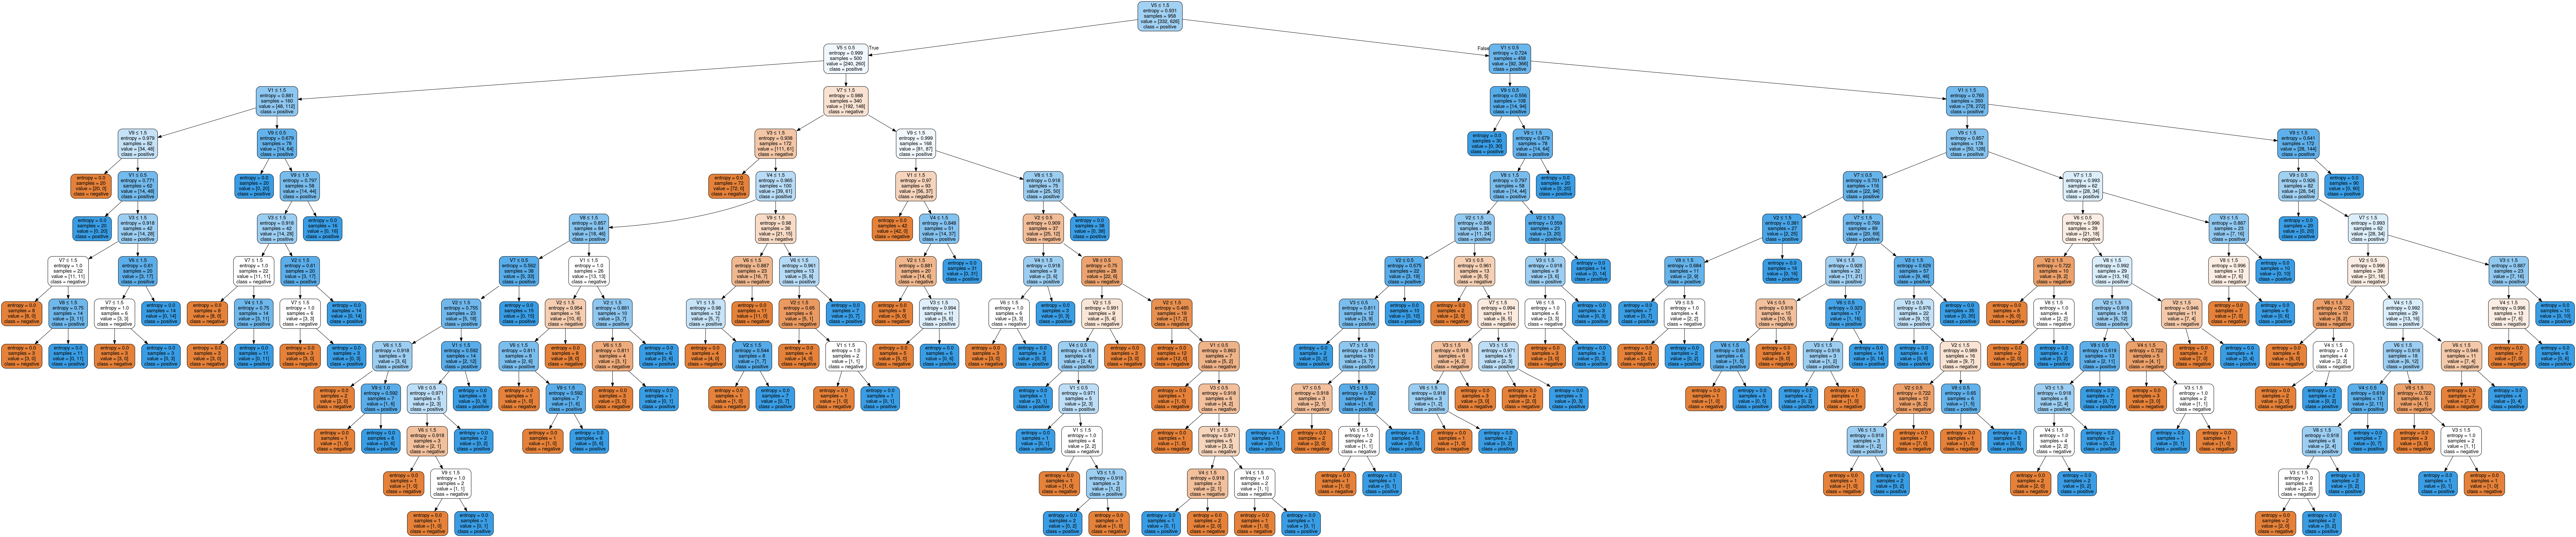

In [30]:
plot_decision_tree(clf, feature_names, class_names) # clf = Tree; feature_names = features; class_names = classes;

## Testing
The tests were conducted by recreating the Decision Tree trained only on 70% of the Dataset and testing it against the remaining 30%. This was done using the train_test_split function imported in the beginning of this notebook, and the .predict() method from the DecisionTreeClassifier. In the end there was also an example of 2 manually inputed tests to prove the results do match the classifications expected in a Tic Tac Toe game.

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=1)
[x_train, x_test, y_train, y_test]

[     V1  V2  V3  V4  V5  V6  V7  V8  V9
 881   0   2   2   2   0   0   1   1   1
 593   0   0   2   1   2   1   2   1   2
 716   2   0   2   0   0   2   1   1   1
 341   1   2   1   0   2   0   1   2   2
 291   2   0   0   1   2   0   0   1   2
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..
 767   1   2   2   0   2   2   1   1   1
 72    2   2   2   0   0   1   1   0   0
 908   0   2   0   2   2   0   1   1   1
 235   2   0   2   1   0   2   1   1   2
 37    2   2   2   1   0   1   2   1   0
 
 [670 rows x 9 columns],      V1  V2  V3  V4  V5  V6  V7  V8  V9
 241   2   0   1   2   2   2   0   1   1
 849   1   1   0   1   2   2   1   2   2
 436   1   0   2   1   2   0   2   2   1
 386   1   1   2   1   2   0   2   2   0
 345   1   2   0   2   2   2   1   1   0
 ..   ..  ..  ..  ..  ..  ..  ..  ..  ..
 808   1   1   2   1   2   2   1   2   0
 134   2   1   2   1   0   2   1   0   2
 669   2   2   0   1   1   1   0   0   2
 320   1   2   1   2   2   2   1   1   2
 57    2   2   2   0   1   1   

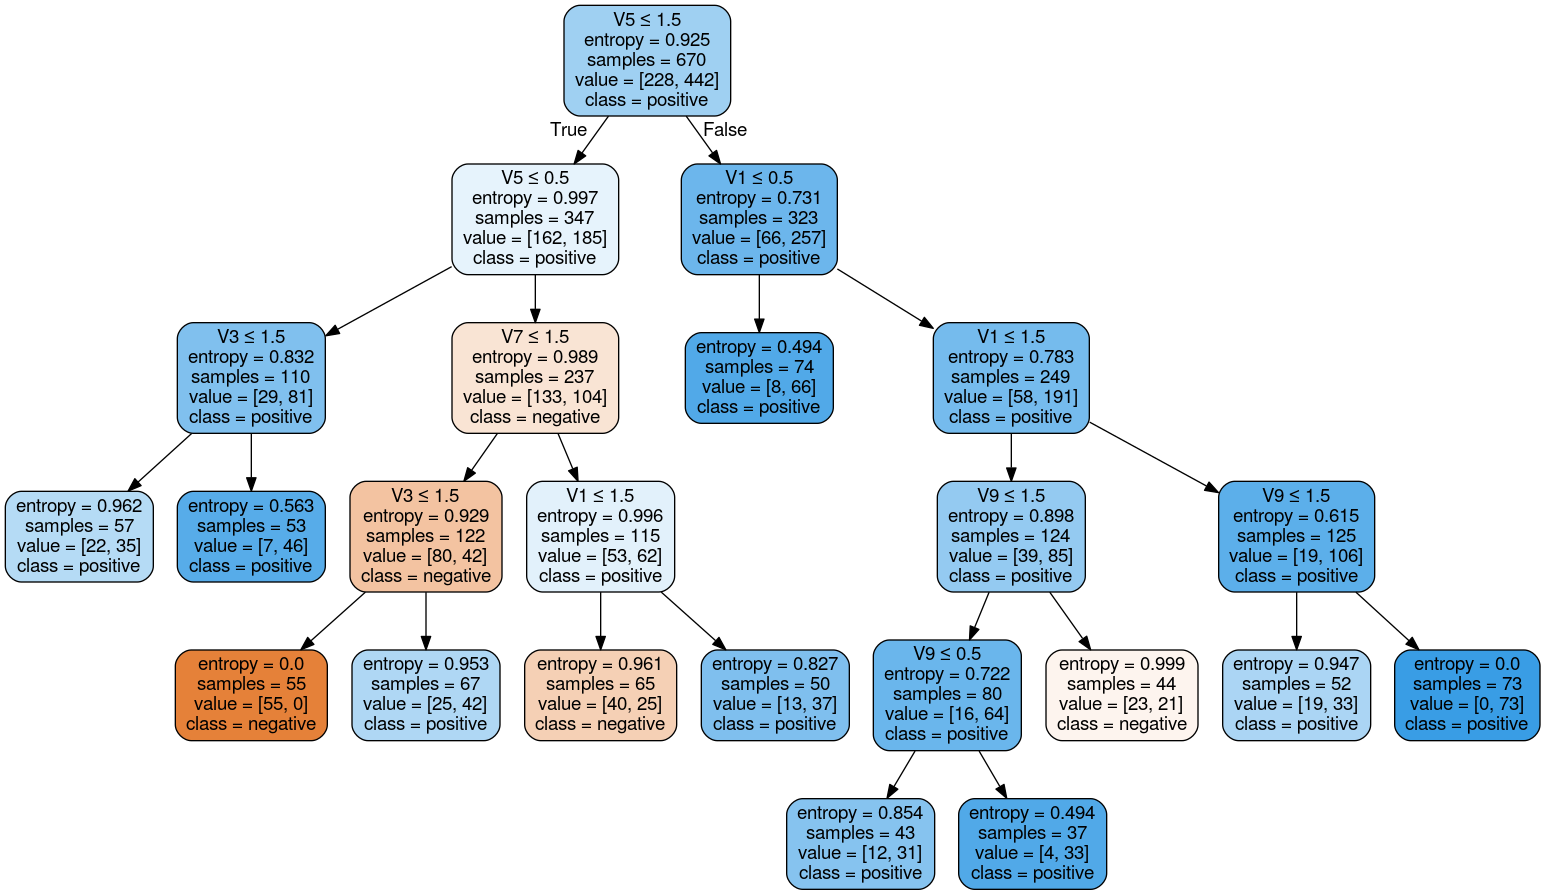

In [32]:
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=80) # change this classifier and check the impact
clf = clf.fit(x_train,y_train)
plot_decision_tree(clf, feature_names, class_names)

In [33]:
# use the model to make predictions with the test data
y_pred = clf.predict(x_test)
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 91
Accuracy: 0.68


In [34]:
negative_test = np.array ([2, 2, 1, 2, 1, 0, 1, 0, 0])
positive_test = np.array ([2, 2, 2, 1, 1, 0, 1, 0, 0])
test_group = [negative_test, positive_test]
y_pred = clf.predict(test_group)
y_pred # should give [0, 1]

array([0, 1])